Import the most important libs

In [283]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request  # for HTTP requests (web scraping, APIs)
from datetime import datetime
import os

In [284]:
from sklearn.ensemble import GradientBoostingRegressor

Concurrency pair data are located on http://www.forextester.com/data/datasources .

You can adjust data with alpha (prediction interval) and nrow (number of rows to fetch). 

In [310]:
nrows = 10000
alpha = 0.90
concurancy_pair_path = "GBPCHF.txt"

In [311]:
pair = pd.read_csv(concurancy_pair_path,
                   nrows = 10000,
                   dtype = {'TIME': np.str, 'DTYYYYMMDD': np.str}
                  )

In [287]:
convert_date = (lambda row: datetime.strptime(str(row['DTYYYYMMDD'])+str(row['TIME']), '%Y%m%d%H%M%S'))

In [288]:
pair['DATETIME'] = pair.apply(convert_date, axis=1)

In [289]:
pair.head(10)

,TICKER,DTYYYYMMDD,TIME,OPEN,HIGH,LOW,CLOSE,VOL,DATETIME
0,GBPCHF,20010102,230100,2.4014,2.4016,2.4014,2.4015,4,2001-01-02 23:01:00
1,GBPCHF,20010102,230200,2.4014,2.4016,2.4014,2.4016,4,2001-01-02 23:02:00
2,GBPCHF,20010102,230300,2.4015,2.4016,2.4015,2.4016,4,2001-01-02 23:03:00
3,GBPCHF,20010102,230400,2.4017,2.4019,2.4017,2.4019,4,2001-01-02 23:04:00
4,GBPCHF,20010102,230500,2.4019,2.4019,2.4016,2.4016,4,2001-01-02 23:05:00
5,GBPCHF,20010102,230700,2.4016,2.4016,2.4015,2.4015,4,2001-01-02 23:07:00
6,GBPCHF,20010102,230800,2.4015,2.4015,2.4013,2.4013,4,2001-01-02 23:08:00
7,GBPCHF,20010102,230900,2.4013,2.4013,2.4013,2.4013,4,2001-01-02 23:09:00
8,GBPCHF,20010102,231000,2.4014,2.4014,2.4014,2.4014,4,2001-01-02 23:10:00
9,GBPCHF,20010102,231100,2.4014,2.4016,2.4014,2.4016,4,2001-01-02 23:11:00


In [290]:
one_day = list(pair.groupby('DTYYYYMMDD'))[0] # fetch first day

In [291]:
last_price = float(one_day[1].tail(1).OPEN) # ostatnia cena otwarcia

In [292]:
last_date = one_day[1].tail(1).DATETIME # ostatnia data

In [253]:
alpha = 0.95

In [293]:
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

In [294]:
X = np.atleast_2d(pair.DATETIME).T
X = X.astype(np.float32)
y = pair.CLOSE

In [295]:
xx = X

In [296]:
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_upper = clf.predict(xx)

clf.set_params(alpha=1.0 - alpha)
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_lower = clf.predict(xx)

clf.set_params(loss='ls')
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_pred = clf.predict(xx)

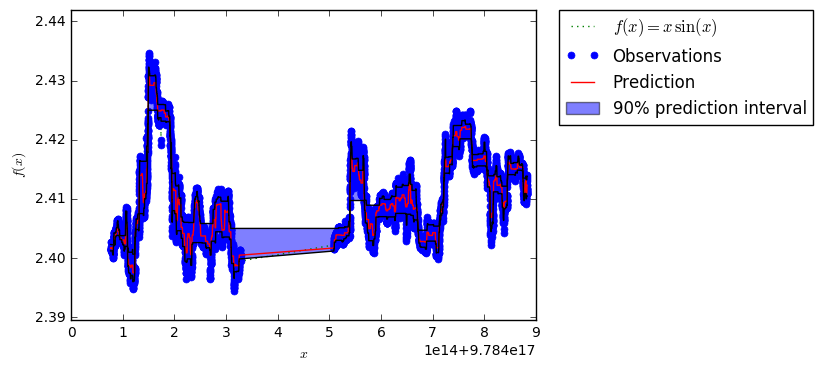

In [297]:

# Plot the function, the prediction and the 90% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(xx, y, 'g:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
plt.plot(xx, y_pred, 'r-', label=u'Prediction')
plt.plot(xx, y_upper, 'k-')
plt.plot(xx, y_lower, 'k-')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.5, fc='b', ec='None', label='90% prediction interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(min(y) * 0.998, max(y) * 1.003)
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1))
plt.show()

In [298]:
back_offset = int(-1 *X.shape[0] * (1 - alpha))

In [299]:
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

clf.fit(X[:back_offset], y[:back_offset])

# Make the prediction on the meshed x-axis
y_upper = clf.predict(xx)

clf.set_params(alpha=1.0 - alpha)
clf.fit(X[:back_offset], y[:back_offset])

# Make the prediction on the meshed x-axis
y_lower = clf.predict(xx)

clf.set_params(loss='ls')
clf.fit(X[:back_offset], y[:back_offset])

# Make the prediction on the meshed x-axis
y_pred = clf.predict(xx)

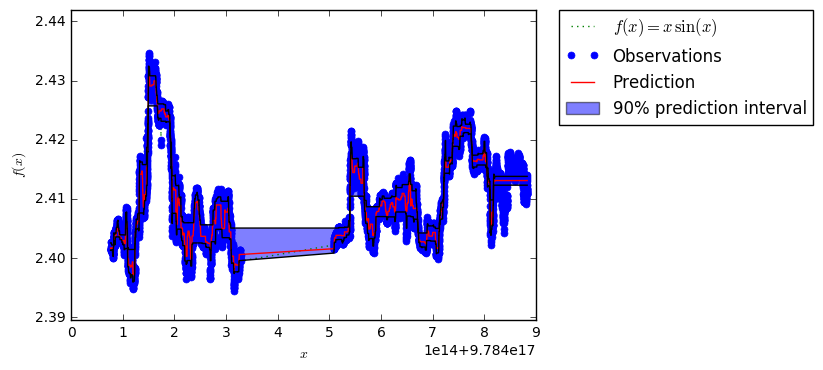

In [300]:

# Plot the function, the prediction and the 90% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(xx, y, 'g:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
plt.plot(xx, y_pred, 'r-', label=u'Prediction')
plt.plot(xx, y_upper, 'k-')
plt.plot(xx, y_lower, 'k-')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.5, fc='b', ec='None', label='90% prediction interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(min(y) * 0.998, max(y) * 1.003)
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1))
plt.show()

zoom to last area

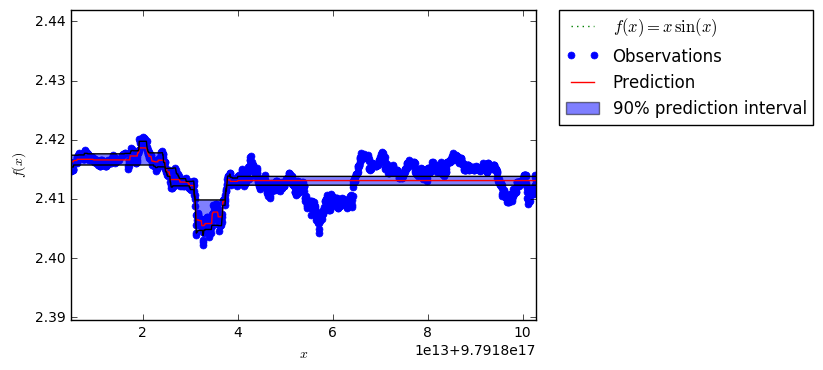

In [308]:

# Plot the function, the prediction and the 90% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(xx, y, 'g:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
plt.plot(xx, y_pred, 'r-', label=u'Prediction')
plt.plot(xx, y_upper, 'k-')
plt.plot(xx, y_lower, 'k-')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.5, fc='b', ec='None', label='90% prediction interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(min(y) * 0.998, max(y) * 1.003)
plt.xlim(, max(X))
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1))
plt.show()